# 01 Esempio stampa scatter casuale

In [1]:
#%matplotlib inline # magic function that renders the figure in a notebook (sometime deprecated)

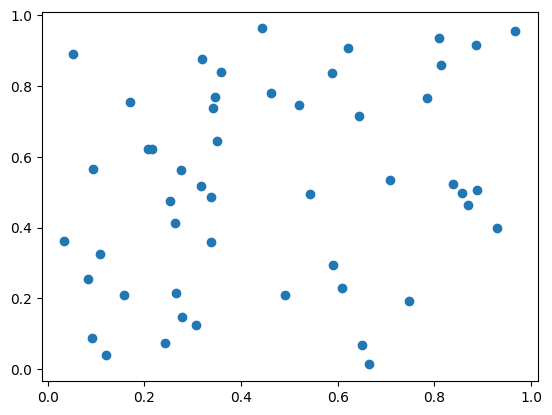

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
x = rand(50)
y = rand(50)
plt.scatter(x,y); # ; avoid plot function <>
plt.show()

# 02 plot line graph

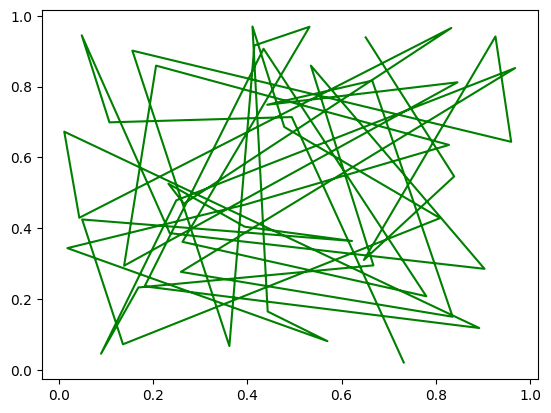

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
x = rand(50)
y = rand(50)
plt.plot(x,y,color='green'); # ; avoid plot function <> is like plt.show()
plt.show()

# 03 add plot detail and legend

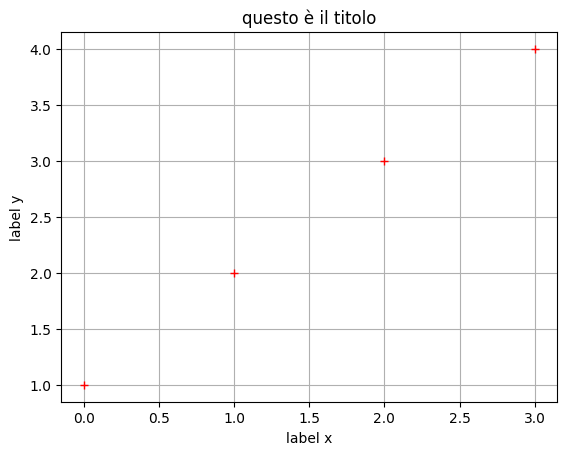

In [4]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4],'+r')  #
plt.ylabel('label y');
plt.xlabel('label x');
plt.grid()
plt.title('questo è il titolo') ;
plt.show()

# 04 Clean Graph

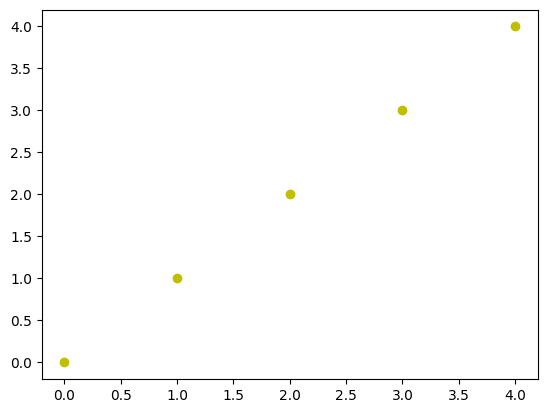

In [5]:
import matplotlib.pyplot as plt

x = [0,1, 2, 3, 4]
y = [0,1, 2, 3, 4]
# h, y must have same len 
plt.plot(x , y ,'oy') # not ; we have show # oy big yellow point
plt.show()

# 05 different colors and linear implicit y

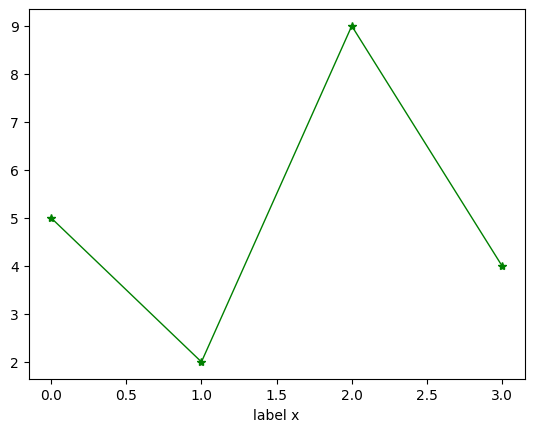

In [6]:
import matplotlib.pyplot as plt

plt.plot([5, 2, 9, 4], marker='*', linewidth=1,color='green')  #
plt.xlabel('label x'); # with ;
#plt.show()

# 06 in place plot

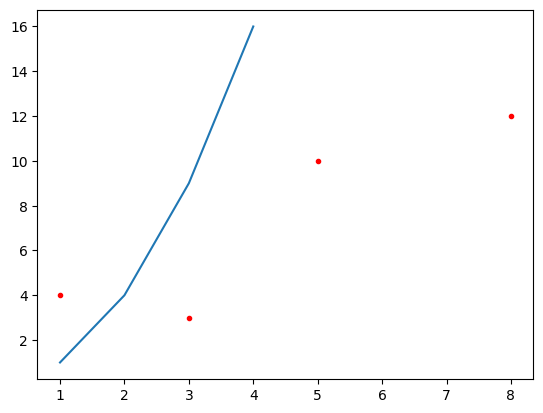

In [7]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16],); # line
plt.plot([1,3,5,8], [4, 3, 10, 12],'.r'); # point

plt.show()

# 07 quadratic 

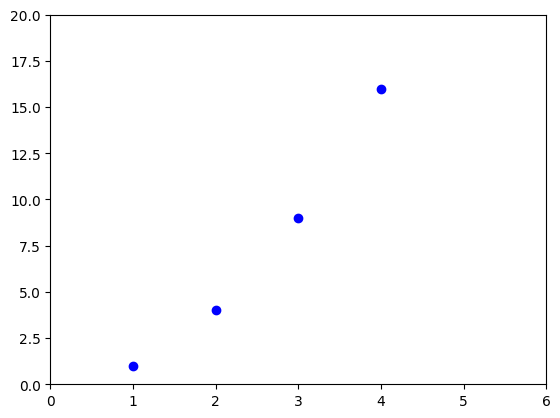

In [8]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16],'ob')
plt.axis([0, 6, 0, 20]);
plt.show()

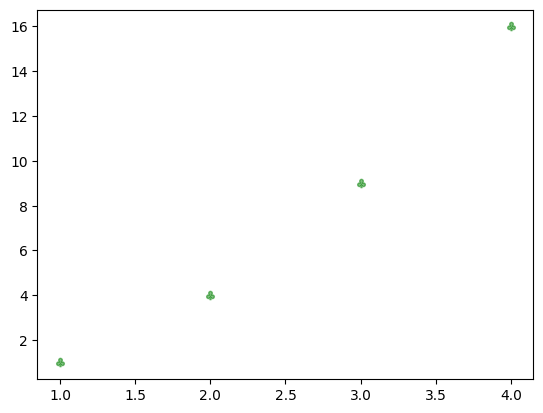

In [9]:
import matplotlib.pyplot as plt

plt.scatter([1, 2, 3, 4], [1, 4, 9, 16],c="g", alpha=0.5, marker=r'$\clubsuit$',label="Luck");
plt.show()

# 08 sqrt

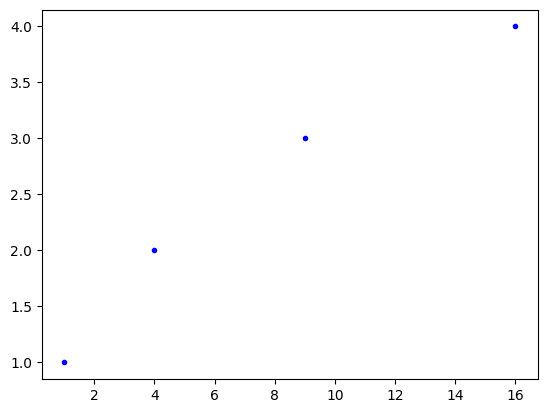

In [14]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.plot(y, x,'.b')
plt.show()

# 09 exponential

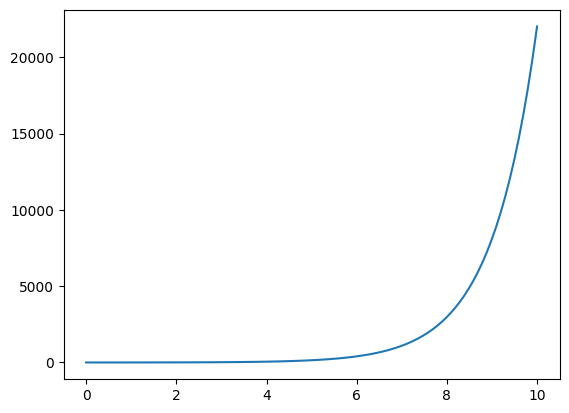

In [11]:
import numpy as np 

x = np.linspace(0,10,100)
y = np.exp(x)


plt.plot(x,y);
plt.show()

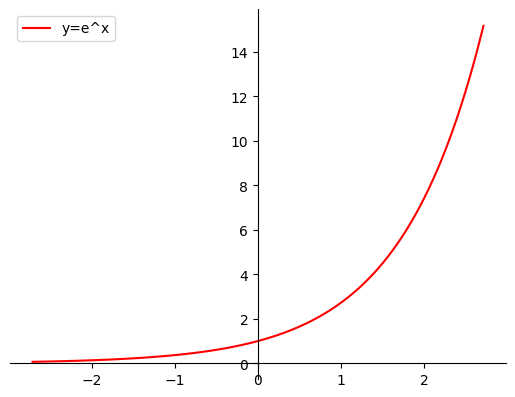

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from math import e


# 100 linearly spaced numbers
x = np.linspace(-e,e,100)

# the function, which is y = e^x here
y = np.exp(x)


# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# plot the function
plt.plot(x,y, 'r', label='y=e^x')

plt.legend(loc='upper left')

plt.show()

# 10 Log

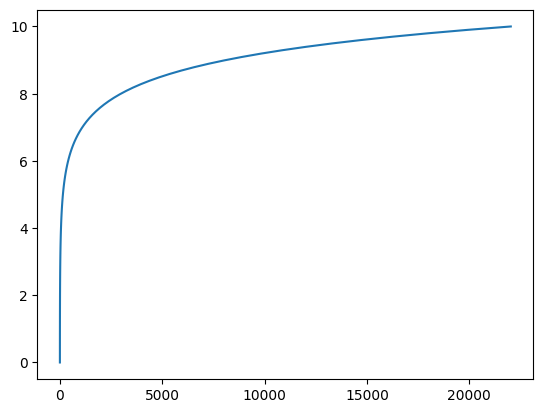

In [12]:
import numpy as np 

x = np.linspace(0,10,100)
y = np.exp(x)


plt.plot(y,x);
plt.show()

# 11 trigo

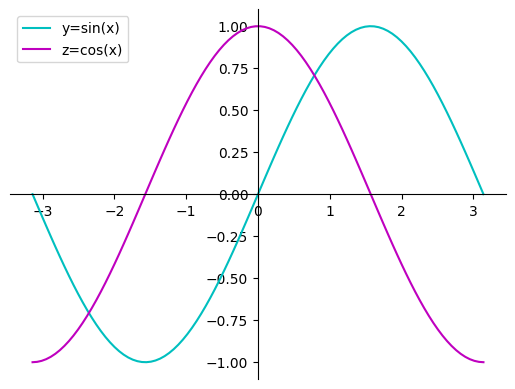

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

x = np.linspace(-pi,pi,100)
y_s = np.sin(x)
y_c=np.cos(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the functions
plt.plot(x,y_s, 'c', label='y=sin(x)')
plt.plot(x,y_c, 'm', label='z=cos(x)')

plt.legend(loc='upper left')

plt.show()


# 12 interpolation cheb

$$
Chebyshev\ interpolation = \cos\left(\frac{(2k + 1)\pi}{2n}\right), \quad k = 0, 1, \dots, n-1
$$

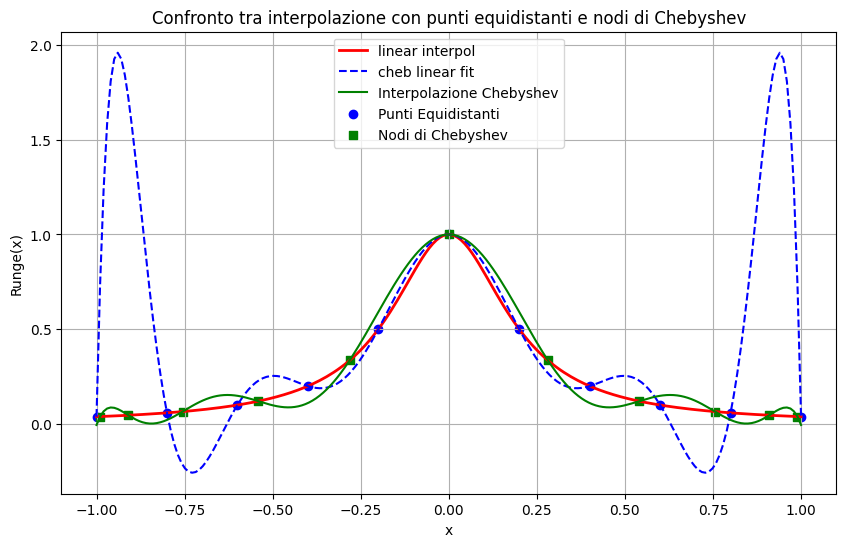

Coefficienti polinomio di Chebyshev lineare: 
 [ 5.88661712e-01 -5.29278060e-16  3.57428503e-01 -3.39220339e-16
  3.79356971e-01  9.57222418e-17 -4.06670894e-01  3.37708669e-16
 -4.48787914e-01  4.98920157e-16 -4.31526840e-01]
Coefficienti polinomio di Chebyshev interpolato: 
 [ 2.01135927e-01  8.87626291e-18 -2.74453603e-01 -1.90640320e-16
  1.90547928e-01  1.62486225e-16 -1.37129922e-01 -1.93888916e-16
  1.05652703e-01  1.78116309e-16 -9.10799162e-02]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, chebval

def Runge(x):
    return 1 / (1 + 25 * x**2)

# nodi di Chebyshev in [a, b]
def chebyshev_nodes(n, a=-1, b=1):
    k = np.arange(n)
    x = np.cos((2 * k + 1) * np.pi / (2 * n))  # nodi su [-1,1]
    return 0.5 * (a + b) + 0.5 * (b - a) * x  # trasformazione su [a,b]


# interpol lineare
x_plot_lin = np.linspace(-1, 1, 200) # n 200 non sempre abbiamo F(x) o i punti
y_plot_lin = Runge(x_plot_lin)  # funzione


# grado polinomio approssimazione e numero nodi  
n = 11  

# approssimazione lineare
x = np.linspace(-1, 1, n)
y = Runge(x)
coeffs_lin = chebfit(x, y, deg=n-1)   # Fit su punti equidistanti
y_fit_lin = chebval(x_plot_lin, coeffs_lin)  # eval con punti equidistanti

# oscillazioni nei nodi
x_cheb = chebyshev_nodes(n)
y_cheb = Runge(x_cheb)
coeffs_cheb = chebfit(x_cheb, y_cheb, deg=n-1)  # fit su nodi di Chebyshev
y_fit_cheb = chebval(x_plot_lin, coeffs_cheb)  # eval con nodi di Chebyshev

# plot
plt.figure(figsize=(10, 6))
plt.plot(x_plot_lin, y_plot_lin, 'r-', label="linear interpol", linewidth=2)
plt.plot(x_plot_lin, y_fit_lin, 'b--', label="cheb linear fit", linewidth=1.5)
plt.plot(x_plot_lin, y_fit_cheb, 'g-', label="Interpolazione Chebyshev", linewidth=1.5)
plt.scatter(x, y, color='blue', marker='o', label="Punti Equidistanti")
plt.scatter(x_cheb, y_cheb, color='green', marker='s', label="Nodi di Chebyshev")

plt.legend()
plt.xlabel("x")
plt.ylabel("Runge(x)")
plt.title("Confronto tra interpolazione con punti equidistanti e nodi di Chebyshev")
plt.grid(True)
plt.show()
print("Coefficienti polinomio di Chebyshev lineare: \n", coeffs_lin)
print("Coefficienti polinomio di Chebyshev interpolato: \n", coeffs_cheb) 

# 13 Polinomial

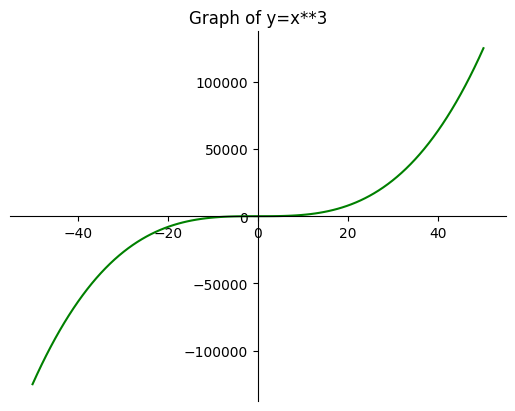

In [26]:
import numpy as np

def f(x):
    return x**3

x = np.linspace(-50,50,100)
y = f(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # axis

ax.spines['left'].set_position('center') # le spine sono i margini della foto
ax.spines['bottom'].set_position('center') # si spostano per essere gli assi

ax.spines['right'].set_color('none') # margine (destra y) tolto 
ax.spines['top'].set_color('none') # colore none

ax.xaxis.set_ticks_position('bottom') #imposta tacche numeriche
ax.yaxis.set_ticks_position('left')
plt.title('Graph of y=x**3')
plt.plot(x,y, "green")
plt.show()


# random lucky

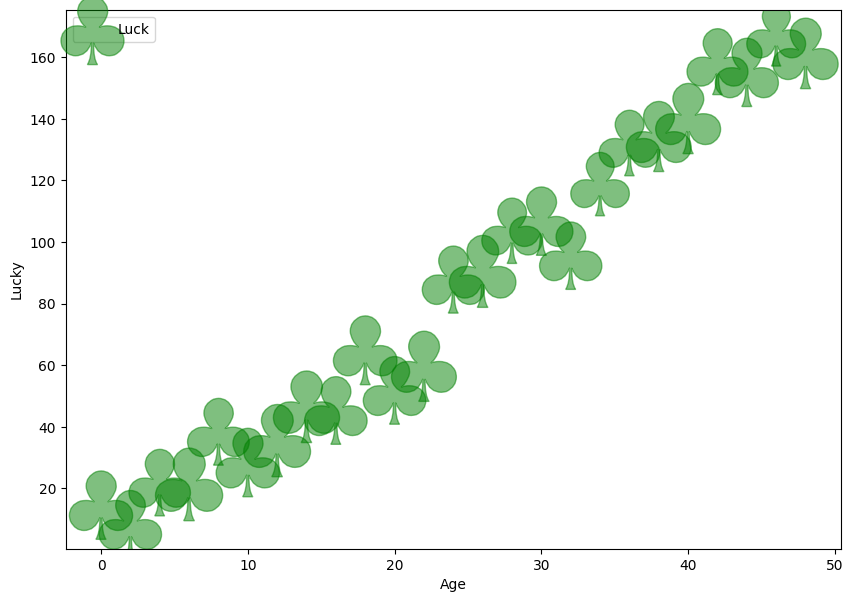

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(667)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 +2000

plt.figure(figsize=(10,7)) ## play to change the dimension
plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Age")
plt.ylabel("Lucky")
plt.legend(loc='upper left');
plt.show()

# Freestyle

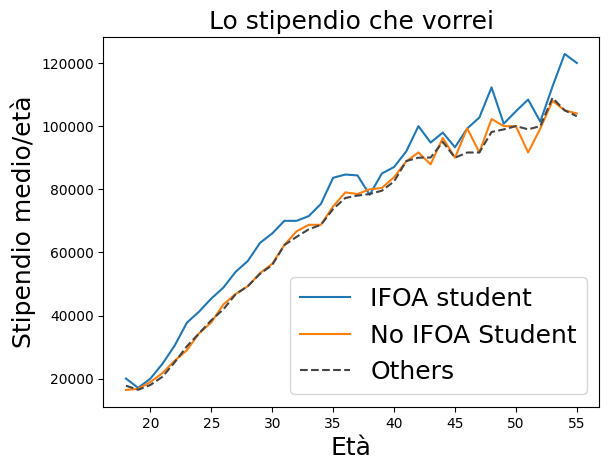

In [5]:
from matplotlib import pyplot as plt
import numpy as np

ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
ifoa_stud_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
            84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]
noifoa_stu_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
            78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
others_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

plt.plot(ages_x, ifoa_stud_y, label="IFOA student");
plt.plot(ages_x, noifoa_stu_y, label='No IFOA Student');
plt.plot(ages_x, others_y, color='#444444', linestyle='--', label='Others');

plt.title('Lo stipendio che vorrei', fontsize=18)
plt.xlabel('Età', fontsize=18)
plt.ylabel('Stipendio medio/età', fontsize=18)
plt.legend(fontsize=18)

plt.show()
#plt.savefig('dream.png')

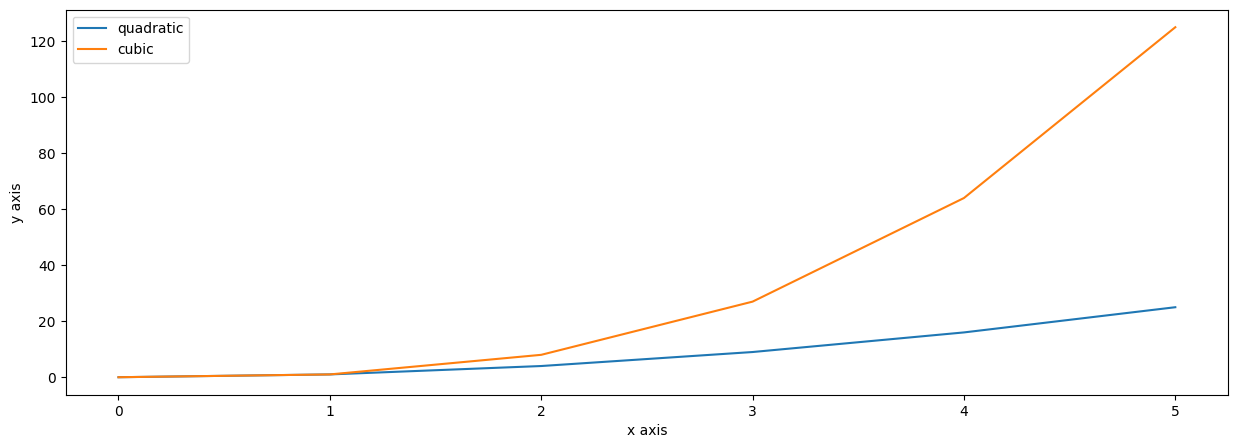

In [10]:
import numpy as np
from matplotlib import pyplot as plt

sample = 5
x = [i for i in range (sample+1)]
y1 = [i**2 for i in x]
y2 = [i**3 for i in x]
plt.figure(figsize=(15,5))
plt.plot(x,y1,y2);

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(['quadratic','cubic'], loc=0); #loc = position
plt.show()

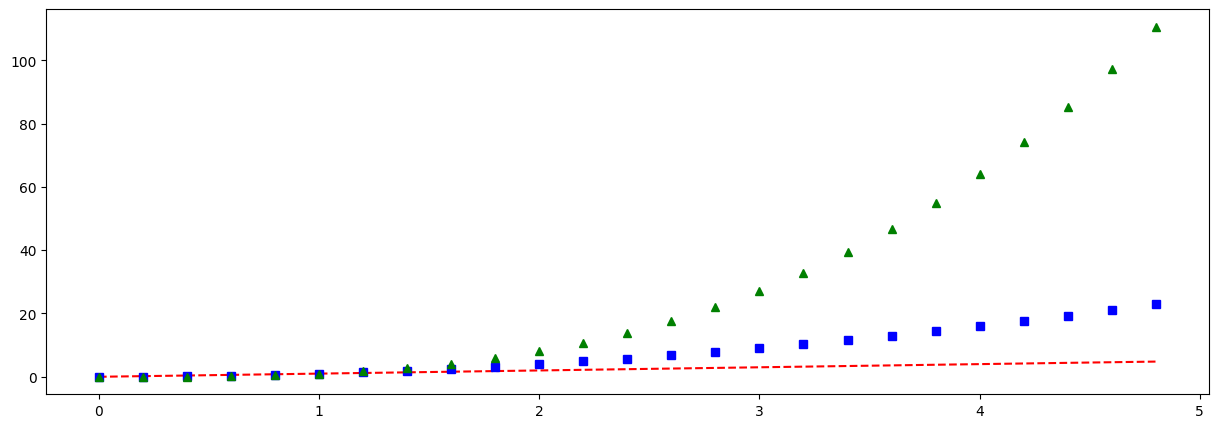

In [11]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(15,5))
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Barplot, Boxplot

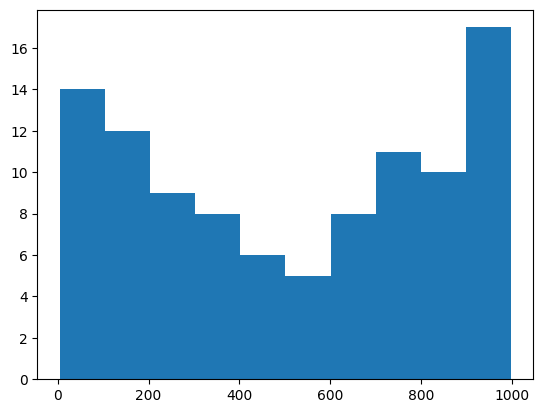

In [12]:
from random import sample
import random
#random.seed(667)
data = sample(range(1,1000), 100)
plt.hist(data);

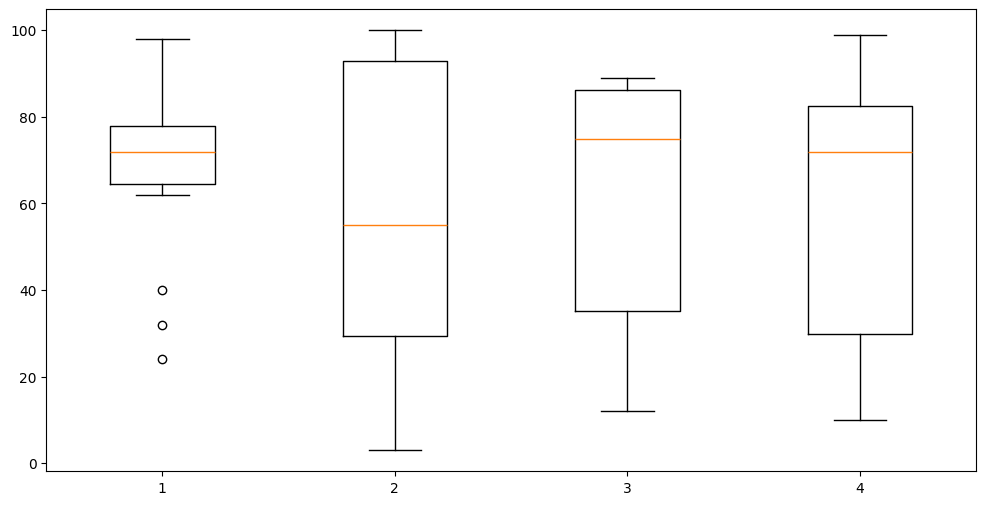

In [13]:
import matplotlib.pyplot as plt
 
sample1 = [82,76,24,40,67,62,75,78,71,32,98,89,78,67,72]
sample2 = [62,5,91,25,36,32,96,95,3,90,95,32,27,55,100]
sample3 = [23,89,12,78,72,89]
sample4 = [59,73,70,16,81,61,88,98,10,87,29,72,16,23,72,88,78,99,75,30]
 
box_plot_data=[sample1,sample2,sample3,sample4]

plt.figure(figsize=(12,6))
plt.boxplot(box_plot_data);

#plt.boxplot(box_plot_data,patch_artist=True,labels=['classe1','classe2','classe3','classe4']);
plt.show()

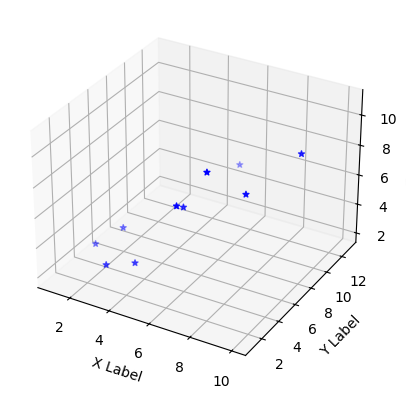

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d' )

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='b', marker='*' )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Dendrogram

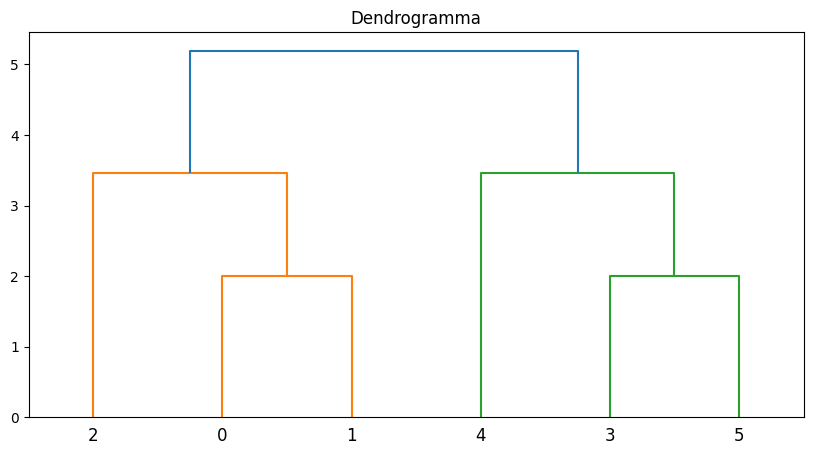

In [16]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])


Z = sch.linkage(X, method='ward')

plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.title("Dendrogramma")
plt.show()